<a href="https://colab.research.google.com/github/NSYSUHermit/Colab_list/blob/master/gml_brest_cancer_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro: GML

這次來測試自動化機器學習套件：Ghalat Machine Learning，  
主要針對回歸問題與分類問題的自動化學習。 


目前套件具有以下功能：   
1.自動特徵工程  
2.自動選擇機器學習和神經網路模型  
3.自動超參數調校  
4.排序模型效果（根據交叉驗證分數）  
5.推薦最佳模型  


我將使用UCI breast cancer dataset(sklearn dataset)來測試此套件for分類的效果以及使用情況。


套件作者Github：https://github.com/Muhammad4hmed/Ghalat-Machine-Learning   
Pypl套件說明： https://s0pypi0org.icopy.site/project/GML/2.0.2/

# Colab Setting

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Import and Install Modules


In [ ]:
# install some modules
!pip install GML
!pip install category_encoders

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from GML.Ghalat_Machine_Learning import Ghalat_Machine_Learning
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data Analysis



## Import Data
利用sklearn中的breast cancer資料來試驗看看。
我將資料30%當作訓練資料，測試資料集保留70%。

In [ ]:
breast_cancer = datasets.load_breast_cancer()
df_x = pd.DataFrame(breast_cancer.data)
df_y = pd.DataFrame(breast_cancer.target)
df_x.columns = breast_cancer.feature_names
df_y.columns = np.array(['label'])
df = pd.concat([df_x,df_y],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.7, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(170, 30)
(399, 30)


## Data Visualization

Label 為 0 的是惡性腫瘤患者，1為良性腫瘤，人數比為: 212位:357位


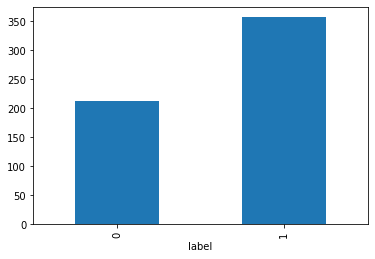

In [ ]:
%matplotlib inline
by_fraud = df_y.groupby('label')
by_fraud.size().plot(kind = 'bar')

從下圖可看出，惡性腫瘤之平均半徑要比楊性腫瘤來的更大。

<bound method _AxesBase.set_figure of <matplotlib.axes._subplots.AxesSubplot object at 0x7f000c283128>>

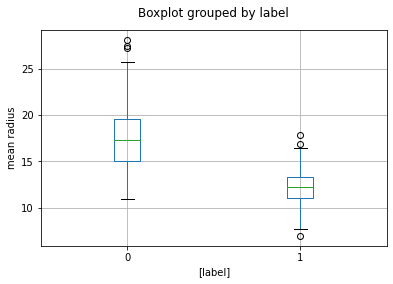

In [ ]:
fig,axes = plt.subplots()

df.boxplot(column='mean radius',by=['label'],ax=axes)
axes.set_title(' ')
axes.set_ylabel('mean radius')
axes.set_figure

## GML:Auto Feature Engineering
自動進行特徵工程，能(簡易的)補缺失值，並新增一些交互作用項當作新的特徵。

In [ ]:
gml = Ghalat_Machine_Learning()
# It may cost pretty long time
new_X,y,new_Test_X = gml.Auto_Feature_Engineering(X_train,y_train,type_of_task='Classification',test_data=X_test,splits=6,fill_na_='median',ratio_drop=0.2,generate_features=True,feateng_steps=2)

Welcome to Ghalat Machine Learning!

All models are set to train
         Have a tea and leave everything on us ;-)
************************************************************ 
Successfully dealt with missing data!

X:

      mean radius  mean texture  ...  worst symmetry  worst fractal dimension
299       10.510         23.09  ...          0.2227                  0.06777
116        8.950         15.76  ...          0.1652                  0.07722
212       28.110         18.47  ...          0.1648                  0.05525
548        9.683         19.34  ...          0.2552                  0.07920
553        9.333         21.94  ...          0.2435                  0.07393
..           ...           ...  ...             ...                      ...
129       19.790         25.12  ...          0.3305                  0.08465
144       10.750         14.97  ...          0.2300                  0.06769
72        17.200         24.52  ...          0.3313                  0.13390
235     

gml.Auto_Feature_Engineering這個函數自動新增6個features於new_X與new_Test_X。

In [ ]:
print(new_X.shape)
print(new_Test_X.shape)

(170, 36)
(399, 36)


稍微預覽一下他新增了哪些變數。

In [ ]:
new_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,sqrt(worsttexture)*log(areaerror),exp(worstsymmetry)*log(worstarea),1/(meansmoothness*worstperimeter),sqrt(meanconcavepoints)*worsttexture,meanradius/worstperimeter,1/(worstarea*worstfractaldimension)
0,10.510,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.018750,0.1695,0.06556,0.2868,1.1430,2.289,20.56,0.01017,0.01443,0.01861,0.012500,0.03464,0.001971,10.930,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777,14.879047,7.363703,0.140545,3.316460,0.149929,0.040683
1,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.023080,0.1305,0.07163,0.3132,0.9789,3.280,16.94,0.01835,0.06760,0.09263,0.023080,0.02384,0.005601,9.414,17.07,63.34,270.0,0.1179,0.18790,0.15440,0.03846,0.1652,0.07722,11.691056,6.604061,0.166855,2.593292,0.141301,0.047963
2,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.159500,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.01345,0.02772,0.06389,0.014070,0.04783,0.004476,28.110,18.47,188.50,2499.0,0.1142,0.15160,0.32010,0.15950,0.1648,0.05525,26.922951,9.225309,0.046454,7.376447,0.149125,0.007243
3,9.683,19.34,61.05,285.7,0.08491,0.05030,0.02337,0.009615,0.1580,0.06235,0.2957,1.3630,2.054,18.24,0.00744,0.01123,0.02337,0.009615,0.02203,0.004154,10.930,25.59,69.10,364.2,0.1199,0.09546,0.09350,0.03846,0.2552,0.07920,14.688399,7.612282,0.170437,2.509256,0.140130,0.034668
4,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.012820,0.1692,0.06576,0.3013,1.8790,2.121,17.86,0.01094,0.01834,0.03996,0.012820,0.03759,0.004623,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393,14.427223,7.258365,0.172168,2.836297,0.148473,0.045728


## GML: Auto Machine Learning (Classification) 
在AUTO Machine Learning中，將進行兩輪競爭，第一輪所有模型將利用5-folds cv的準確率爭奪前5名，第二輪競爭時，前5名的模型將再競爭一次.並最終推薦排名第一的模型。

In [ ]:
from sklearn.neural_network import MLPClassifier
best_model = gml.GMLClassifier(new_X,y,neural_net='Yes',epochs=100,models=[MLPClassifier()],verbose=False)

Model  LogisticRegressionCV  got validation accuracy of  0.9607843137254902
Model  LogisticRegression  got validation accuracy of  0.9607843137254902
Model  SVC  got validation accuracy of  0.9607843137254902
Model  DecisionTreeClassifier  got validation accuracy of  1.0
Model  KNeighborsClassifier  got validation accuracy of  0.9607843137254902
Model  SGDClassifier  got validation accuracy of  0.9215686274509803
Model  RandomForestClassifier  got validation accuracy of  1.0
Model  AdaBoostClassifier  got validation accuracy of  1.0
Model  ExtraTreesClassifier  got validation accuracy of  0.9607843137254902
Model  XGBClassifier  got validation accuracy of  0.9803921568627451
Model  LGBMClassifier  got validation accuracy of  0.9411764705882353
Model  CatBoostClassifier  got validation accuracy of  0.9803921568627451
Model  GradientBoostingClassifier  got validation accuracy of  0.9803921568627451
Model  NaiveBayesGaussian  got validation accuracy of  0.9411764705882353
Model  MLPClassi

最終GML推薦我們使用SVC,RandomForestClassifier,Sequential來建立stacking模型。  
我們來看看最終best_model:Sequential的超參數為哪些。

In [ ]:
best_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## GML Test

將GML新增變數後的data匯入模型中訓練，最後將測試集(也利用GML新增變數後)的資料匯入模型當中做預測，看看效果如何。

In [ ]:
clf = best_model.fit(new_X,y)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, clf.predict(new_Test_X))

0.9147869674185464

這個準確率好像還好，試試看用原始train data或其他方法來建模看看效果如何。

In [ ]:
# 使用GML補值後的train data
from sklearn.ensemble import RandomForestClassifier
rf_model = GaussianNB()
rf_clf = rf_model.fit(new_X,y)
accuracy_score(y_test, rf_clf.predict(new_Test_X))

0.9573934837092731

In [ ]:
# 使用原始train data
rf_model = GaussianNB()
rf_clf = rf_model.fit(X_train,y)
accuracy_score(y_test, rf_clf.predict(X_test))

0.9298245614035088

In [ ]:
# 使用GML補值後的train data 建立stacking model
from sklearn import model_selection
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

clf1 = best_model
clf2 = RandomForestClassifier()
clf3 = AdaBoostClassifier()

lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2 ,clf3], meta_classifier= lr)

print('5-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3, sclf], ['best_model','RandomForestClassifier','AdaBoostClassifier','StackingClassifier']):
    scores = model_selection.cross_val_score(clf, new_X,y, cv=5, scoring='accuracy')
    print("Cross validation accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

print("\n")
stack_clf = sclf.fit(new_X,y)
accuracy_score(y_test, stack_clf.predict(new_Test_X))

5-fold cross validation:

Cross validation accuracy: 0.92 (+/- 0.04) [best_model]
Cross validation accuracy: 0.98 (+/- 0.01) [RandomForestClassifier]
Cross validation accuracy: 0.98 (+/- 0.02) [AdaBoostClassifier]
Cross validation accuracy: 0.98 (+/- 0.02) [StackingClassifier]




0.9548872180451128

# Conclusion


在自動特徵工程中所自動生成的交互作用項，都有不錯的效果(這次實驗內)，以randomforest的情況為例，在使用new data訓練下的模型最終預測率大概比原始data的準確率高大約10%左右。

而stacking模型效果則有點差強人意，可能之後拿其他data來嘗試看看。

它可以快速處理資料、建立模型、挑選超參數、並有一定程度的預測準確率。
